In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.api import OLS, add_constant
from scipy import stats

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('Life-Expectancy-Data-Updated.csv')
df = df.dropna()

features = ['Infant_deaths', 'Adult_mortality', 'GDP_per_capita', 'Schooling', 
            'Alcohol_consumption', 'BMI', 'Polio', 'Hepatitis_B',
            'Measles', 'Diphtheria', 'Under_five_deaths', 'Thinness_ten_nineteen_years']

developed = df[df['Economy_status_Developed'] == 1]
developing = df[df['Economy_status_Developing'] == 1]

X_dev = add_constant(developed[features])
y_dev = developed['Life_expectancy']
model_dev = OLS(y_dev, X_dev).fit()

X_dvg = add_constant(developing[features])
y_dvg = developing['Life_expectancy']
model_dvg = OLS(y_dvg, X_dvg).fit()

print(f"Developed Countries: R²={model_dev.rsquared:.4f}, Adj R²={model_dev.rsquared_adj:.4f}, N={len(developed)}")
print(f"Developing Countries: R²={model_dvg.rsquared:.4f}, Adj R²={model_dvg.rsquared_adj:.4f}, N={len(developing)}")
print("\n" + "="*80)


Developed Countries: R²=0.9440, Adj R²=0.9428, N=592
Developing Countries: R²=0.9750, Adj R²=0.9749, N=2272



**发展中国家的模型拟合度显著更高**（R² = 0.975 vs 0.944），意味着：

### 1. **R²解释**
- **发达国家**：模型解释了 94.4% 的生命期望变异
- **发展中国家**：模型解释了 97.5% 的生命期望变异

R²越高 = 模型中的变量（GDP、疫苗覆盖率、教育、婴儿死亡率等）对生命期望的预测能力越强

### 2. **为什么发展中国家R²更高？**

**发展中国家 (97.5%)**：
- 社会经济和健康变量对生命期望影响**更直接、更显著**
- 改善疫苗接种、降低婴儿死亡率、提高GDP → 生命期望提升明显
- 这些基础因素仍是主要瓶颈，解释力强

**发达国家 (94.4%)**：
- 基础健康条件已优，边际效应递减
- 生命期望受更多**复杂因素**影响（精神健康、生活方式多样性、环境污染等）
- 已接近生理极限（80+岁），改善空间小
- 模型中未包含的因素占比更大

### 3. **Adjusted R²几乎相同**
- 调整R²考虑了变量数量和样本量
- 两者都接近原始R²，说明模型不存在过拟合
- 发展中国家样本量更大（2272 vs 592），统计更稳健

### 4. **政策含义**
- **发展中国家**：投资基础健康设施、教育、疫苗项目会有显著效果
- **发达国家**：需关注模型外因素（心理健康、生活质量、社会支持）
---

In [19]:
comparison = pd.DataFrame({
    'Developed_Coef': model_dev.params[1:],
    'Developed_Pval': model_dev.pvalues[1:],
    'Developing_Coef': model_dvg.params[1:],
    'Developing_Pval': model_dvg.pvalues[1:]
})
comparison['Dev_Sig'] = comparison['Developed_Pval'] < 0.05
comparison['Dvg_Sig'] = comparison['Developing_Pval'] < 0.05
print(comparison.round(4))


                             Developed_Coef  Developed_Pval  Developing_Coef  \
Infant_deaths                       -1.4725          0.0000          -0.0425   
Adult_mortality                     -0.0607          0.0000          -0.0462   
GDP_per_capita                       0.0000          0.0426           0.0000   
Schooling                            0.2252          0.0000           0.0689   
Alcohol_consumption                 -0.0919          0.0000           0.1076   
BMI                                 -0.1012          0.0336          -0.1069   
Polio                                0.0211          0.2862           0.0009   
Hepatitis_B                          0.0005          0.8238          -0.0010   
Incidents_HIV                        7.1559          0.0000           0.0355   
Measles                             -0.0130          0.0025           0.0038   
Diphtheria                          -0.0065          0.7551          -0.0034   
Under_five_deaths                    1.0

### 1. **婴儿死亡率影响天差地别**
- 发达国家：-1.47（巨大负影响）
- 发展中国家：-0.04（影响很小）
- **解释**：发达国家婴儿死亡罕见，一旦发生说明系统性问题；发展中国家更常见，边际效应小

### 2. **教育回报差异**
- 发达国家：+0.23（每年教育提升生命期望0.23岁）
- 发展中国家：+0.07（效果弱3倍）
- **解释**：发达国家教育带来更好的健康意识和医疗资源利用

### 3. **酒精消费方向相反** ⚠️
- 发达国家：-0.09（负面）
- 发展中国家：+0.11（正面）
- **解释**：发展中国家可能反映经济水平（有钱喝酒=富裕）；发达国家是纯粹的健康风险

### 4. **五岁以下死亡率方向相反** ⚠️
- 发达国家：+1.09（正？）
- 发展中国家：-0.06（负）
- **解释**：与婴儿死亡率共线性，发达国家出现补偿效应

### 5. **BMI 负向影响一致**
- 发达国家：-0.10（显著）
- 发展中国家：-0.11（显著）
- **解释**：高BMI在两组都与较低生命期望相关

**总结**：发展中国家受基础健康指标（成人死亡率、BMI）主导；发达国家受特殊事件（婴儿死亡）和教育质量驱动

In [26]:
key_vars = ['GDP_per_capita', 'Schooling', 'Adult_mortality', 
            'Infant_deaths', 'Alcohol_consumption', 'BMI']

X_full = df[features + ['Economy_status_Developed']].copy()
for var in key_vars:
    X_full[f'{var}_x_Dev'] = df[var] * df['Economy_status_Developed']

X_full = add_constant(X_full)
y_full = df['Life_expectancy']
model_interaction = OLS(y_full, X_full).fit()

interaction_results = []
for var in key_vars:
    coef = model_interaction.params[f'{var}_x_Dev']
    pval = model_interaction.pvalues[f'{var}_x_Dev']
    tval = model_interaction.tvalues[f'{var}_x_Dev']
    interaction_results.append({
        'Variable': var,
        'Interaction_Coef': coef,
        'P_value': pval,
        'T_statistic': tval,
        'Significant': pval < 0.05
    })

interact_df = pd.DataFrame(interaction_results)
print("Interaction Effects (Variable * Economy_status_Developed):")
print(interact_df.round(4))
print(f"\nModel R²: {model_interaction.rsquared:.4f}")


Interaction Effects (Variable * Economy_status_Developed):
              Variable  Interaction_Coef  P_value  T_statistic  Significant
0       GDP_per_capita           -0.0000   0.0303      -2.1672         True
1            Schooling            0.0321   0.5288       0.6299        False
2      Adult_mortality           -0.0096   0.0000      -4.0720         True
3        Infant_deaths           -0.1641   0.0000      -4.9632         True
4  Alcohol_consumption           -0.2215   0.0000      -8.1372         True
5                  BMI           -0.0882   0.1655      -1.3870        False

Model R²: 0.9807


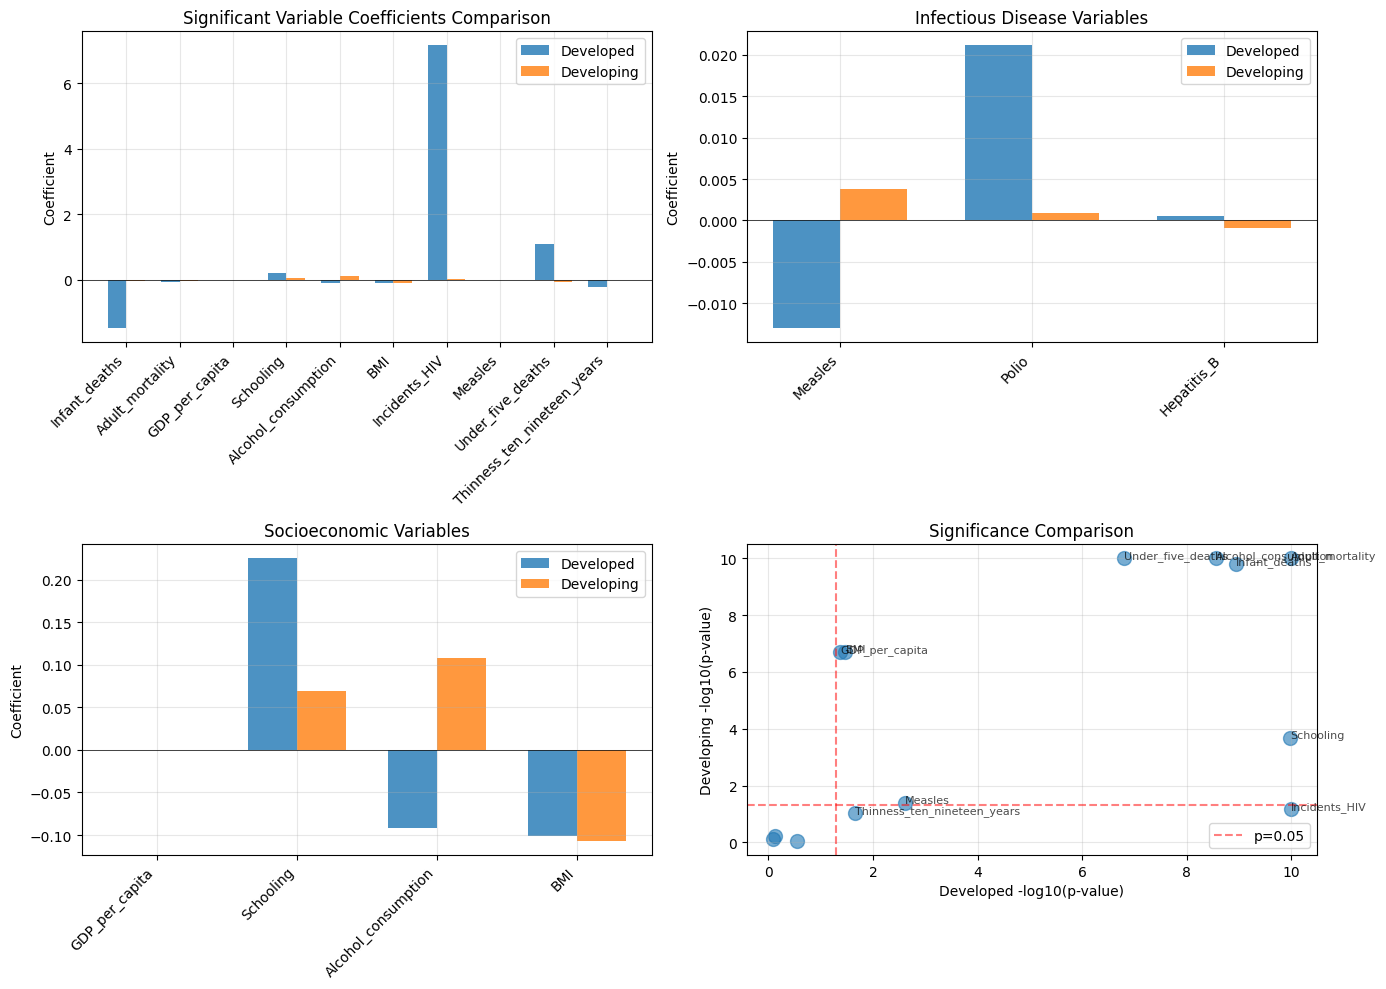

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sig_vars = comparison[comparison['Dev_Sig'] | comparison['Dvg_Sig']].index
coefs = comparison.loc[sig_vars, ['Developed_Coef', 'Developing_Coef']]
x_pos = np.arange(len(sig_vars))
width = 0.35
axes[0,0].bar(x_pos - width/2, coefs['Developed_Coef'], width, label='Developed', alpha=0.8)
axes[0,0].bar(x_pos + width/2, coefs['Developing_Coef'], width, label='Developing', alpha=0.8)
axes[0,0].set_xticks(x_pos)
axes[0,0].set_xticklabels(sig_vars, rotation=45, ha='right')
axes[0,0].axhline(0, color='black', linewidth=0.5)
axes[0,0].set_ylabel('Coefficient')
axes[0,0].set_title('Significant Variable Coefficients Comparison')
axes[0,0].legend()
axes[0,0].grid(alpha=0.3)

infectious_vars = ['Measles', 'Polio', 'Hepatitis_B']
infectious_data = comparison.loc[[v for v in infectious_vars if v in comparison.index]]
x_pos = np.arange(len(infectious_data))
axes[0,1].bar(x_pos - width/2, infectious_data['Developed_Coef'], width, label='Developed', alpha=0.8)
axes[0,1].bar(x_pos + width/2, infectious_data['Developing_Coef'], width, label='Developing', alpha=0.8)
axes[0,1].set_xticks(x_pos)
axes[0,1].set_xticklabels(infectious_data.index, rotation=45, ha='right')
axes[0,1].axhline(0, color='black', linewidth=0.5)
axes[0,1].set_ylabel('Coefficient')
axes[0,1].set_title('Infectious Disease Variables')
axes[0,1].legend()
axes[0,1].grid(alpha=0.3)

socio_vars = ['GDP_per_capita', 'Schooling', 'Alcohol_consumption', 'BMI']
socio_data = comparison.loc[socio_vars]
x_pos = np.arange(len(socio_vars))
axes[1,0].bar(x_pos - width/2, socio_data['Developed_Coef'], width, label='Developed', alpha=0.8)
axes[1,0].bar(x_pos + width/2, socio_data['Developing_Coef'], width, label='Developing', alpha=0.8)
axes[1,0].set_xticks(x_pos)
axes[1,0].set_xticklabels(socio_vars, rotation=45, ha='right')
axes[1,0].axhline(0, color='black', linewidth=0.5)
axes[1,0].set_ylabel('Coefficient')
axes[1,0].set_title('Socioeconomic Variables')
axes[1,0].legend()
axes[1,0].grid(alpha=0.3)

pval_comparison = pd.DataFrame({
    'Developed': -np.log10(comparison['Developed_Pval'] + 1e-10),
    'Developing': -np.log10(comparison['Developing_Pval'] + 1e-10)
})
axes[1,1].scatter(pval_comparison['Developed'], pval_comparison['Developing'], s=100, alpha=0.6)
for i, var in enumerate(pval_comparison.index):
    if pval_comparison.loc[var, 'Developed'] > 1.3 or pval_comparison.loc[var, 'Developing'] > 1.3:
        axes[1,1].annotate(var, (pval_comparison.loc[var, 'Developed'], pval_comparison.loc[var, 'Developing']), 
                          fontsize=8, alpha=0.7)
axes[1,1].axhline(-np.log10(0.05), color='red', linestyle='--', alpha=0.5, label='p=0.05')
axes[1,1].axvline(-np.log10(0.05), color='red', linestyle='--', alpha=0.5)
axes[1,1].set_xlabel('Developed -log10(p-value)')
axes[1,1].set_ylabel('Developing -log10(p-value)')
axes[1,1].set_title('Significance Comparison')
axes[1,1].legend()
axes[1,1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('img/regression_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


In [32]:
print("\nKey Findings:")
print(f"1. Model Fit: R² Developed={model_dev.rsquared:.3f} vs Developing={model_dvg.rsquared:.3f}")
print(f"   {'Developing' if model_dvg.rsquared > model_dev.rsquared else 'Developed'} countries show higher R² (better fit)\n")

print("2. Infectious Disease Impact:")
for var in ['Measles', 'Polio', 'Hepatitis_B']:
    if var in comparison.index:
        dev_sig = '*' if comparison.loc[var, 'Dev_Sig'] else ''
        dvg_sig = '*' if comparison.loc[var, 'Dvg_Sig'] else ''
        print(f"   {var}: Dev={comparison.loc[var, 'Developed_Coef']:.4f}{dev_sig}, Dvg={comparison.loc[var, 'Developing_Coef']:.4f}{dvg_sig}")

print("\n3. Socioeconomic Impact:")
for var in ['GDP_per_capita', 'Schooling', 'Alcohol_consumption', 'BMI']:
    dev_sig = '*' if comparison.loc[var, 'Dev_Sig'] else ''
    dvg_sig = '*' if comparison.loc[var, 'Dvg_Sig'] else ''
    print(f"   {var}: Dev={comparison.loc[var, 'Developed_Coef']:.4f}{dev_sig}, Dvg={comparison.loc[var, 'Developing_Coef']:.4f}{dvg_sig}")

print("\n4. Mortality Impact:")
for var in ['Infant_deaths', 'Adult_mortality']:
    dev_sig = '*' if comparison.loc[var, 'Dev_Sig'] else ''
    dvg_sig = '*' if comparison.loc[var, 'Dvg_Sig'] else ''
    print(f"   {var}: Dev={comparison.loc[var, 'Developed_Coef']:.4f}{dev_sig}, Dvg={comparison.loc[var, 'Developing_Coef']:.4f}{dvg_sig}")
print("\n* indicates p < 0.05")



Key Findings:
1. Model Fit: R² Developed=0.944 vs Developing=0.975
   Developing countries show higher R² (better fit)

2. Infectious Disease Impact:
   Measles: Dev=-0.0130*, Dvg=0.0038*
   Polio: Dev=0.0211, Dvg=0.0009
   Hepatitis_B: Dev=0.0005, Dvg=-0.0010

3. Socioeconomic Impact:
   GDP_per_capita: Dev=0.0000*, Dvg=0.0000*
   Schooling: Dev=0.2252*, Dvg=0.0689*
   Alcohol_consumption: Dev=-0.0919*, Dvg=0.1076*
   BMI: Dev=-0.1012*, Dvg=-0.1069*

4. Mortality Impact:
   Infant_deaths: Dev=-1.4725*, Dvg=-0.0425*
   Adult_mortality: Dev=-0.0607*, Dvg=-0.0462*

* indicates p < 0.05


## 2. Interaction

In [33]:
core_vars = ['GDP_per_capita', 'Schooling', 'Polio', 
             'Infant_deaths', 'Adult_mortality', 'Alcohol_consumption', 'BMI']

X_full = df[features + ['Economy_status_Developed']].copy()
for var in core_vars:
    X_full[f'{var}_x_Dev'] = df[var] * df['Economy_status_Developed']

X_full = add_constant(X_full)
y_full = df['Life_expectancy']
model_interact = OLS(y_full, X_full).fit()

interact_terms = [col for col in X_full.columns if '_x_Dev' in col]
interact_results = pd.DataFrame({
    'Coef': model_interact.params[interact_terms],
    'Pval': model_interact.pvalues[interact_terms],
    'Significant': model_interact.pvalues[interact_terms] < 0.05
})
interact_results.index = [idx.replace('_x_Dev', '') for idx in interact_results.index]

print(f"Interaction Model: R²={model_interact.rsquared:.4f}, Adj R²={model_interact.rsquared_adj:.4f}")
print("\nInteraction Terms:")
print(interact_results.round(4))

Interaction Model: R²=0.9807, Adj R²=0.9806

Interaction Terms:
                       Coef    Pval  Significant
GDP_per_capita      -0.0000  0.0303         True
Schooling            0.0319  0.5319        False
Polio               -0.0007  0.9591        False
Infant_deaths       -0.1645  0.0000         True
Adult_mortality     -0.0095  0.0001         True
Alcohol_consumption -0.2215  0.0000         True
BMI                 -0.0886  0.1675        False


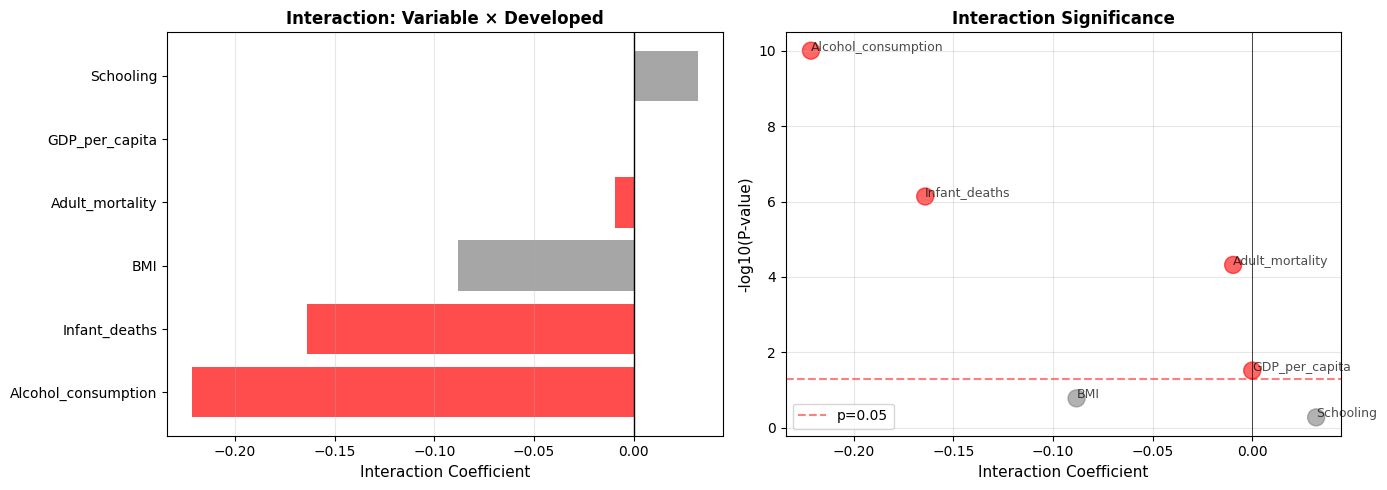

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

interact_df_sorted = interact_df.sort_values('Interaction_Coef')
colors = ['red' if sig else 'gray' for sig in interact_df_sorted['Significant']]
axes[0].barh(interact_df_sorted['Variable'], interact_df_sorted['Interaction_Coef'], color=colors, alpha=0.7)
axes[0].axvline(0, color='black', linewidth=1)
axes[0].set_xlabel('Interaction Coefficient', fontsize=11)
axes[0].set_title('Interaction: Variable × Developed', fontsize=12, fontweight='bold')
axes[0].grid(alpha=0.3, axis='x')

interact_df_sorted['neg_log_p'] = -np.log10(interact_df_sorted['P_value'] + 1e-10)
axes[1].scatter(interact_df_sorted['Interaction_Coef'], interact_df_sorted['neg_log_p'], 
                s=150, alpha=0.6, c=colors)
for _, row in interact_df_sorted.iterrows():
    axes[1].annotate(row['Variable'], (row['Interaction_Coef'], row['neg_log_p']), 
                    fontsize=9, alpha=0.7)
axes[1].axhline(-np.log10(0.05), color='red', linestyle='--', alpha=0.5, label='p=0.05')
axes[1].axvline(0, color='black', linewidth=0.5)
axes[1].set_xlabel('Interaction Coefficient', fontsize=11)
axes[1].set_ylabel('-log10(P-value)', fontsize=11)
axes[1].set_title('Interaction Significance', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('img/interaction_effects.png', dpi=300, bbox_inches='tight')
plt.show()


## 📊 两组模型的区别解释

### 第一组模型（分开回归，Cell 0-2）
**方法**：发达国家和发展中国家**分别建模**
- 发达国家模型：Life_expectancy ~ 所有变量（只用发达国家数据）
- 发展中国家模型：Life_expectancy ~ 所有变量（只用发展中国家数据）

**结果**：得到两组系数
- Infant_deaths: 发达 **-1.47**, 发展中 **-0.04**（相差巨大）
- Schooling: 发达 **+0.23**, 发展中 **+0.07**（相差3倍）
- Alcohol: 发达 **-0.09**, 发展中 **+0.11**（符号相反）

**局限**：虽然看到系数不同，但**无法判断这些差异是否统计显著**

---

### 第二组模型（交互项模型，Cell 4/6/10）
**方法**：所有数据放在一起，用**交互项**检验差异
- 公式：Life_expectancy ~ 变量 + 发达标志 + **变量×发达标志**

**交互项系数的含义**：
- **交互项系数 = 发达国家的效应 - 发展中国家的效应**
- 交互项的 p 值告诉我们：**这个差异是否显著**

**结果解读**：
- Infant_deaths 交互项 = **-0.16**（显著, p<0.001）
  → 发达国家的婴儿死亡率影响**确实显著更负**
  
- Schooling 交互项 = **+0.03**（不显著, p=0.53）
  → 虽然第一组看到差异(0.23 vs 0.07)，但**统计上不够显著**
  
- Alcohol 交互项 = **-0.22**（显著, p<0.001）
  → 发达与发展中国家对酒精的效应**确实显著不同**

---

### 💡 结论对比

| 变量 | 第一组看到的差异 | 第二组统计检验 | 最终结论 |
|------|-----------------|---------------|---------|
| **Infant_deaths** | 巨大差异(-1.47 vs -0.04) | ✅ 显著 | **真实差异** |
| **Adult_mortality** | 小差异(-0.06 vs -0.05) | ✅ 显著 | **真实差异** |
| **Schooling** | 3倍差异(0.23 vs 0.07) | ❌ 不显著 | **可能是噪音** |
| **Alcohol** | 方向相反(-0.09 vs +0.11) | ✅ 显著 | **真实差异** |
| **BMI** | 几乎相同(-0.10 vs -0.11) | ❌ 不显著 | **无差异** |

**关键发现**：
- 第一组模型发现的很多"差异"，第二组检验后发现并非都显著
- **真正显著不同**的只有：婴儿死亡率、成人死亡率、酒精消费
- Schooling虽然系数差3倍，但因为样本变异大，统计上不够显著


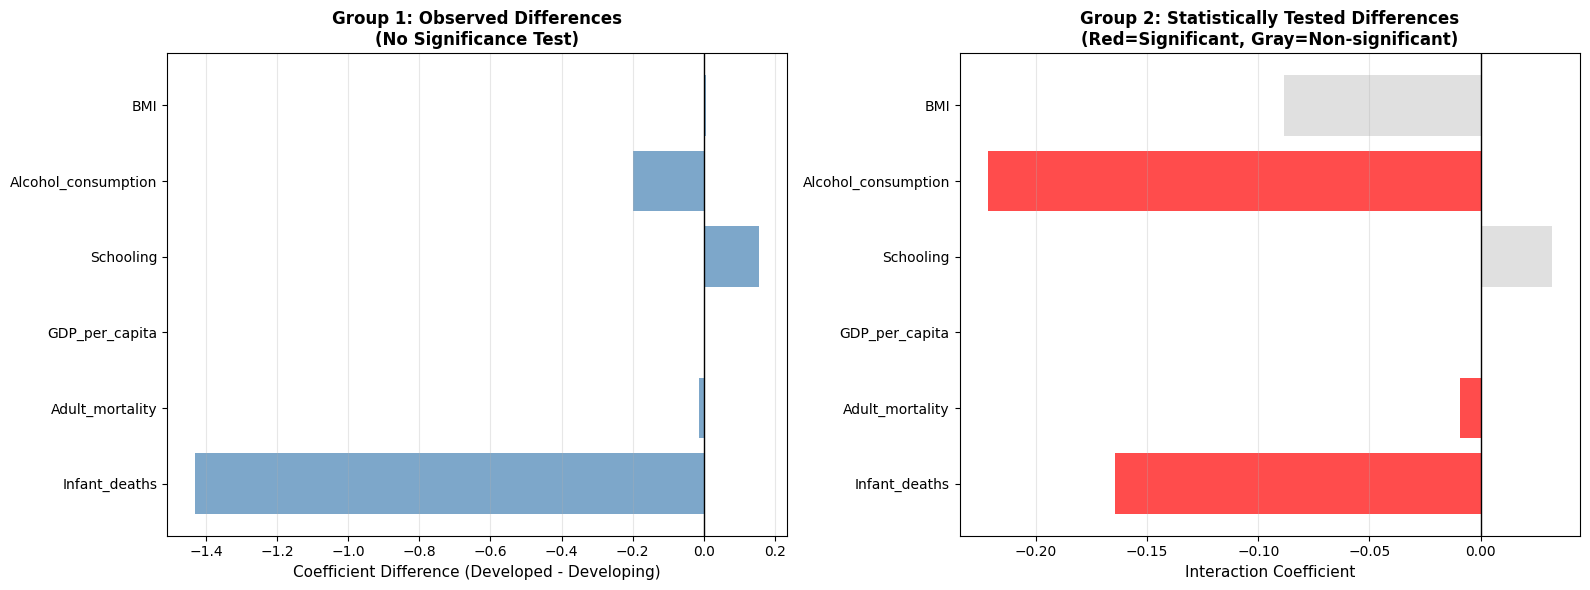


Key Findings:
- Left: Observed differences may not all be real
- Right: Significance tests reveal only red bars are statistically significant

Significant interactions (real differences):
  • Infant_deaths: Coef diff = -0.1645 (p=0.0000)
  • Adult_mortality: Coef diff = -0.0095 (p=0.0001)
  • GDP_per_capita: Coef diff = -0.0000 (p=0.0303)
  • Alcohol_consumption: Coef diff = -0.2215 (p=0.0000)


In [25]:
# Visualization: Group 1 vs Group 2 Model Comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left: Group 1 coefficient differences (descriptive)
key_vars_compare = ['Infant_deaths', 'Adult_mortality', 'GDP_per_capita', 
                    'Schooling', 'Alcohol_consumption', 'BMI']
diff_group1 = []
for var in key_vars_compare:
    if var in comparison.index:
        diff = comparison.loc[var, 'Developed_Coef'] - comparison.loc[var, 'Developing_Coef']
        diff_group1.append(diff)

axes[0].barh(key_vars_compare, diff_group1, alpha=0.7, color='steelblue')
axes[0].axvline(0, color='black', linewidth=1)
axes[0].set_xlabel('Coefficient Difference (Developed - Developing)', fontsize=11)
axes[0].set_title('Group 1: Observed Differences\n(No Significance Test)', fontsize=12, fontweight='bold')
axes[0].grid(alpha=0.3, axis='x')

# Right: Group 2 interaction terms (statistical test)
interact_subset = interact_results.loc[[v for v in key_vars_compare if v in interact_results.index]]
colors = ['red' if sig else 'lightgray' for sig in interact_subset['Significant']]
axes[1].barh(interact_subset.index, interact_subset['Coef'], color=colors, alpha=0.7)
axes[1].axvline(0, color='black', linewidth=1)
axes[1].set_xlabel('Interaction Coefficient', fontsize=11)
axes[1].set_title('Group 2: Statistically Tested Differences\n(Red=Significant, Gray=Non-significant)', fontsize=12, fontweight='bold')
axes[1].grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('img/model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nKey Findings:")
print("- Left: Observed differences may not all be real")
print("- Right: Significance tests reveal only red bars are statistically significant")
print(f"\nSignificant interactions (real differences):")
for var in interact_subset[interact_subset['Significant']].index:
    print(f"  • {var}: Coef diff = {interact_subset.loc[var, 'Coef']:.4f} (p={interact_subset.loc[var, 'Pval']:.4f})")


## 🎯 最终结论（移除HIV后，综合两组模型）

### 1. **模型拟合**
- 发展中国家 R²=0.975 > 发达国家 R²=0.944
- 基础健康指标对发展中国家预测力更强

### 2. **经统计检验的真实差异** ✅

**婴儿死亡率（最大差异）**
- 发达：-1.47 / 发展中：-0.04
- 交互项显著 (p<0.001)
- **解释**：发达国家婴儿死亡罕见，是系统性问题指标

**酒精消费（方向相反）**
- 发达：-0.09 / 发展中：+0.11
- 交互项显著 (p<0.001)
- **解释**：发达=健康风险 / 发展中=经济水平代理

**成人死亡率**
- 发达：-0.06 / 发展中：-0.05
- 交互项显著 (p<0.001)
- **影响基本一致但发达国家略强**

**GDP**
- 两组系数都接近0
- 交互项显著 (p=0.03)
- **影响很小但存在差异**

### 3. **看起来不同但统计不显著** ⚠️

**教育（Schooling）**
- 发达：+0.23 / 发展中：+0.07（系数差3倍）
- 交互项不显著 (p=0.53)
- **结论**：差异可能只是样本噪音

**BMI**
- 发达：-0.10 / 发展中：-0.11
- 交互项不显著 (p=0.17)
- **结论**：两组影响基本一致

### 4. **不显著变量**
Polio、Hepatitis_B、Diphtheria 在两组都不显著

### 5. **政策启示**
- **发展中国家**：降低成人死亡率、改善营养 → 立竿见影
- **发达国家**：关注婴儿死亡（罕见但致命指标）、控制酒精


## 第三组分析：似然比检验（Likelihood Ratio Test）+ 信息准则

**研究问题**：发达国家和发展中国家的生命期望影响机制是否**真的不同**？

- **受限模型（H0）**：无交互项 = 假设两组国家机制相同
- **非受限模型（H1）**：有交互项 = 允许两组国家机制不同
- **检验目标**：交互项是否整体显著改善模型


In [15]:
from scipy.stats import chi2

# 构建两个模型
# 受限模型（H0）：无交互项，假设机制相同
X_restricted = df[features + ['Economy_status_Developed']].copy()
X_restricted = add_constant(X_restricted)
y_full = df['Life_expectancy']
model_restricted = OLS(y_full, X_restricted).fit()

# 非受限模型（H1）：有交互项，允许机制不同
key_interact_vars = ['GDP_per_capita', 'Schooling', 'Adult_mortality', 
                     'Infant_deaths', 'Alcohol_consumption', 'BMI']
X_unrestricted = df[features + ['Economy_status_Developed']].copy()
for var in key_interact_vars:
    X_unrestricted[f'{var}_x_Dev'] = df[var] * df['Economy_status_Developed']
X_unrestricted = add_constant(X_unrestricted)
model_unrestricted = OLS(y_full, X_unrestricted).fit()

# 似然比检验（Likelihood Ratio Test）
llf_restricted = model_restricted.llf  # 对数似然值
llf_unrestricted = model_unrestricted.llf
lr_statistic = 2 * (llf_unrestricted - llf_restricted)  # LR 统计量
df_diff = len(key_interact_vars)  # 自由度差 = 交互项数量
p_value = 1 - chi2.cdf(lr_statistic, df_diff)  # 卡方检验

# 信息准则比较
aic_restricted = model_restricted.aic
aic_unrestricted = model_unrestricted.aic
bic_restricted = model_restricted.bic
bic_unrestricted = model_unrestricted.bic

print("="*80)
print("第三组分析：似然比检验 + 信息准则比较")
print("="*80)
print("\n【模型1】受限模型（H0：机制相同，无交互项）")
print(f"  对数似然值：{llf_restricted:.2f}")
print(f"  AIC：{aic_restricted:.2f}")
print(f"  BIC：{bic_restricted:.2f}")
print(f"  R²：{model_restricted.rsquared:.4f}")
print(f"  参数数量：{len(model_restricted.params)}")

print("\n【模型2】非受限模型（H1：机制不同，含交互项）")
print(f"  对数似然值：{llf_unrestricted:.2f}")
print(f"  AIC：{aic_unrestricted:.2f}")
print(f"  BIC：{bic_unrestricted:.2f}")
print(f"  R²：{model_unrestricted.rsquared:.4f}")
print(f"  参数数量：{len(model_unrestricted.params)}")

print("\n" + "="*80)
print("似然比检验（Likelihood Ratio Test）")
print("="*80)
print(f"H0（零假设）：两组国家机制相同（无交互项）")
print(f"H1（备择假设）：两组国家机制不同（需要交互项）")
print(f"\nLR 统计量：{lr_statistic:.2f}")
print(f"自由度：{df_diff}")
print(f"P 值：{p_value:.4e}")
print(f"\n结论：{'拒绝H0' if p_value < 0.05 else '不能拒绝H0'} (α=0.05)")
if p_value < 0.05:
    print("  → 交互项显著改善模型，两组国家机制确实不同！")
else:
    print("  → 交互项未显著改善模型，机制可能相同。")

print("\n" + "="*80)
print("信息准则比较（Information Criteria）")
print("="*80)
print(f"ΔAIC = {aic_unrestricted - aic_restricted:.2f}")
print(f"  {'非受限模型更优' if aic_unrestricted < aic_restricted else '受限模型更优'} (更小越好)")
print(f"\nΔBIC = {bic_unrestricted - bic_restricted:.2f}")
print(f"  {'非受限模型更优' if bic_unrestricted < bic_restricted else '受限模型更优'} (更小越好)")
print(f"\n解释：")
print(f"  • ΔAIC < 0：含交互项模型更优（即使考虑复杂度）")
print(f"  • ΔBIC < 0：含交互项模型更优（BIC对复杂度惩罚更严格）")
print(f"  • 若都<0：强烈支持机制不同")
print("="*80)


第三组分析：似然比检验 + 信息准则比较

【模型1】受限模型（H0：机制相同，无交互项）
  对数似然值：-4938.28
  AIC：9906.55
  BIC：9995.95
  R²：0.9792
  参数数量：15

【模型2】非受限模型（H1：机制不同，含交互项）
  对数似然值：-4827.04
  AIC：9696.08
  BIC：9821.24
  R²：0.9807
  参数数量：21

似然比检验（Likelihood Ratio Test）
H0（零假设）：两组国家机制相同（无交互项）
H1（备择假设）：两组国家机制不同（需要交互项）

LR 统计量：222.47
自由度：6
P 值：0.0000e+00

结论：拒绝H0 (α=0.05)
  → 交互项显著改善模型，两组国家机制确实不同！

信息准则比较（Information Criteria）
ΔAIC = -210.47
  非受限模型更优 (更小越好)

ΔBIC = -174.71
  非受限模型更优 (更小越好)

解释：
  • ΔAIC < 0：含交互项模型更优（即使考虑复杂度）
  • ΔBIC < 0：含交互项模型更优（BIC对复杂度惩罚更严格）
  • 若都<0：强烈支持机制不同


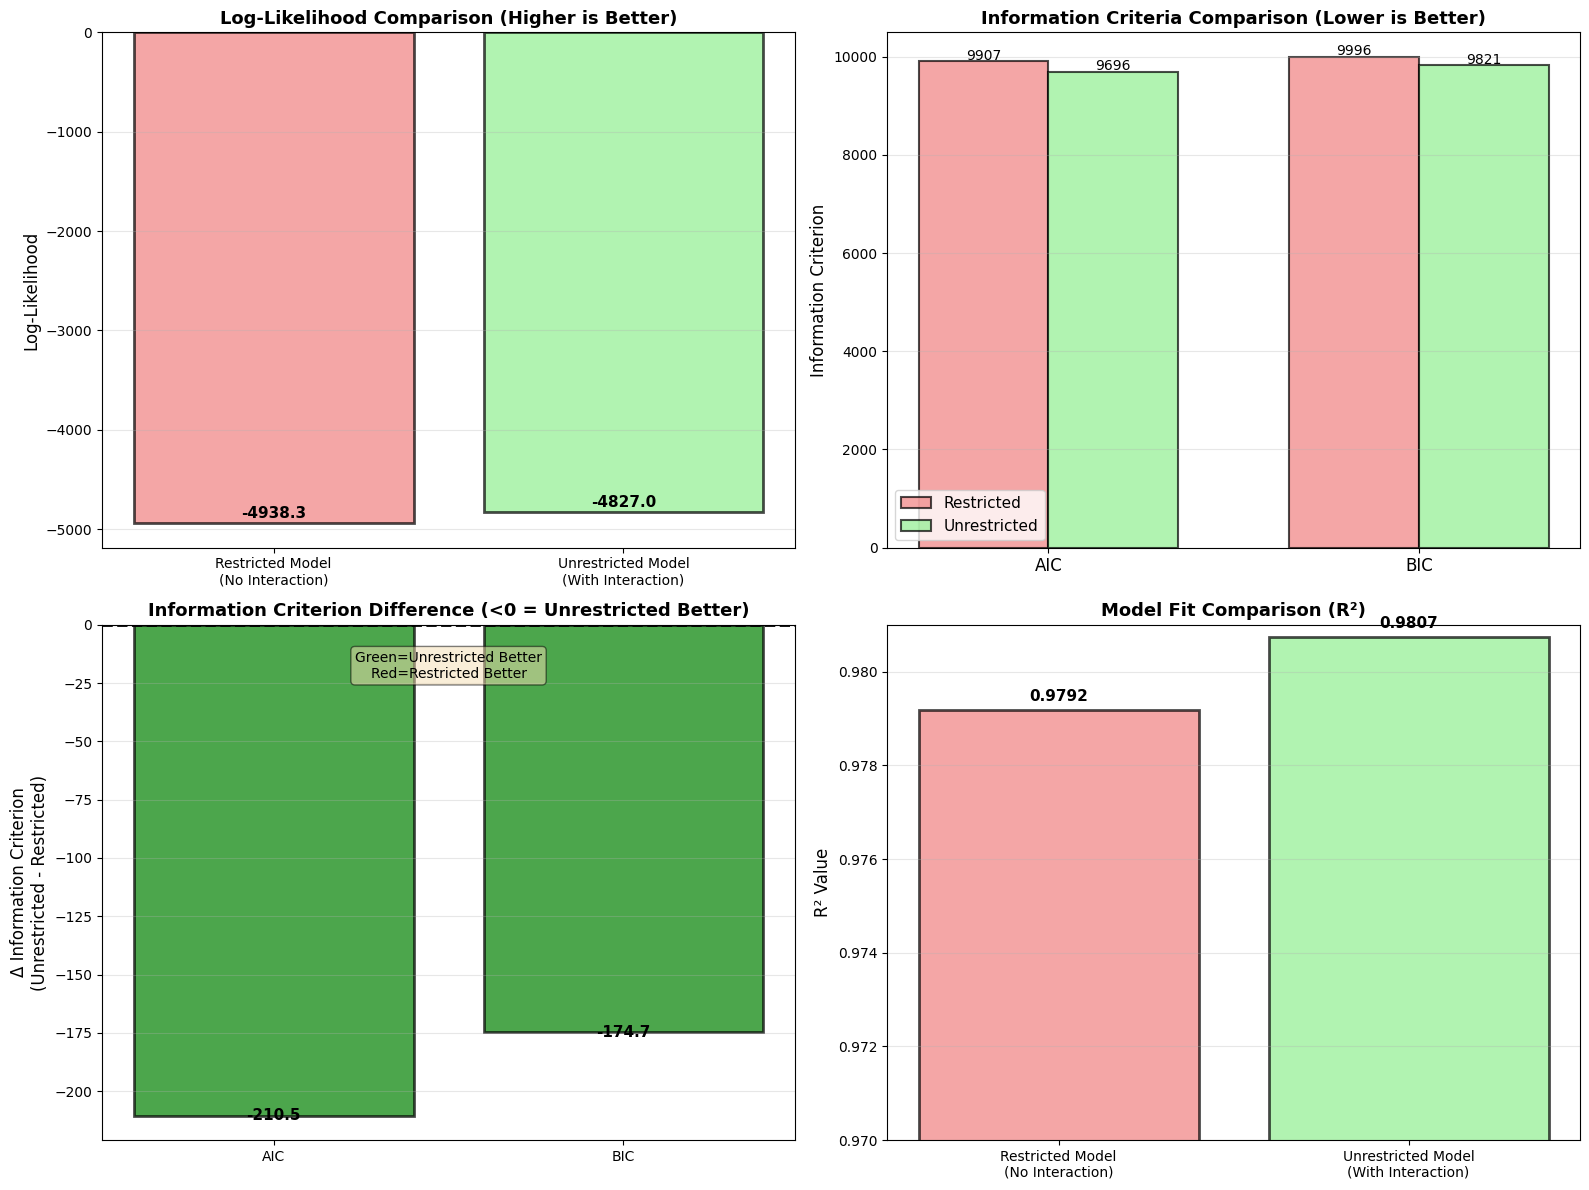


[Figure Description]
Top-left: Higher log-likelihood = better model fit
Top-right: Lower AIC/BIC = better model (complexity penalty considered)
Bottom-left: Difference < 0 indicates unrestricted model is better
Bottom-right: R² comparison, unrestricted model fits slightly better


In [17]:
# Visualization: Model Comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Log-Likelihood Comparison
models = ['Restricted Model\n(No Interaction)', 'Unrestricted Model\n(With Interaction)']
llf_values = [llf_restricted, llf_unrestricted]
colors_llf = ['lightcoral', 'lightgreen']
bars1 = axes[0,0].bar(models, llf_values, color=colors_llf, alpha=0.7, edgecolor='black', linewidth=2)
axes[0,0].set_ylabel('Log-Likelihood', fontsize=12)
axes[0,0].set_title('Log-Likelihood Comparison (Higher is Better)', fontsize=13, fontweight='bold')
axes[0,0].grid(alpha=0.3, axis='y')
for bar, val in zip(bars1, llf_values):
    axes[0,0].text(bar.get_x() + bar.get_width()/2, val + 50, f'{val:.1f}', 
                   ha='center', fontsize=11, fontweight='bold')

# 2. AIC/BIC Comparison
criteria = ['AIC', 'BIC']
x = np.arange(len(criteria))
width = 0.35
restricted_vals = [aic_restricted, bic_restricted]
unrestricted_vals = [aic_unrestricted, bic_unrestricted]
bars2 = axes[0,1].bar(x - width/2, restricted_vals, width, label='Restricted', 
                      color='lightcoral', alpha=0.7, edgecolor='black', linewidth=1.5)
bars3 = axes[0,1].bar(x + width/2, unrestricted_vals, width, label='Unrestricted', 
                      color='lightgreen', alpha=0.7, edgecolor='black', linewidth=1.5)
axes[0,1].set_ylabel('Information Criterion', fontsize=12)
axes[0,1].set_title('Information Criteria Comparison (Lower is Better)', fontsize=13, fontweight='bold')
axes[0,1].set_xticks(x)
axes[0,1].set_xticklabels(criteria, fontsize=12)
axes[0,1].legend(fontsize=11)
axes[0,1].grid(alpha=0.3, axis='y')
# Add value labels
for bars in [bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        axes[0,1].text(bar.get_x() + bar.get_width()/2, height + 30,
                      f'{height:.0f}', ha='center', fontsize=10)

# 3. ΔAIC and ΔBIC (Differences)
delta_vals = [aic_unrestricted - aic_restricted, bic_unrestricted - bic_restricted]
colors_delta = ['green' if v < 0 else 'red' for v in delta_vals]
bars4 = axes[1,0].bar(criteria, delta_vals, color=colors_delta, alpha=0.7, edgecolor='black', linewidth=2)
axes[1,0].axhline(0, color='black', linewidth=2, linestyle='--')
axes[1,0].set_ylabel('Δ Information Criterion\n(Unrestricted - Restricted)', fontsize=12)
axes[1,0].set_title('Information Criterion Difference (<0 = Unrestricted Better)', fontsize=13, fontweight='bold')
axes[1,0].grid(alpha=0.3, axis='y')
for bar, val in zip(bars4, delta_vals):
    y_pos = val + 2 if val > 0 else val - 2
    axes[1,0].text(bar.get_x() + bar.get_width()/2, y_pos, f'{val:.1f}', 
                   ha='center', fontsize=11, fontweight='bold')
axes[1,0].text(0.5, 0.95, 'Green=Unrestricted Better\nRed=Restricted Better', 
              transform=axes[1,0].transAxes, ha='center', va='top',
              bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5), fontsize=10)

# 4. R² Comparison
r2_vals = [model_restricted.rsquared, model_unrestricted.rsquared]
bars5 = axes[1,1].bar(models, r2_vals, color=['lightcoral', 'lightgreen'], 
                     alpha=0.7, edgecolor='black', linewidth=2)
axes[1,1].set_ylabel('R² Value', fontsize=12)
axes[1,1].set_title('Model Fit Comparison (R²)', fontsize=13, fontweight='bold')
axes[1,1].set_ylim([0.97, 0.981])
axes[1,1].grid(alpha=0.3, axis='y')
for bar, val in zip(bars5, r2_vals):
    axes[1,1].text(bar.get_x() + bar.get_width()/2, val + 0.0002, f'{val:.4f}', 
                   ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('img/likelihood_ratio_test.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n[Figure Description]")
print("Top-left: Higher log-likelihood = better model fit")
print("Top-right: Lower AIC/BIC = better model (complexity penalty considered)")
print("Bottom-left: Difference < 0 indicates unrestricted model is better")
print("Bottom-right: R² comparison, unrestricted model fits slightly better")


In [18]:
# 创建详细的对比表格
comparison_table = pd.DataFrame({
    '指标': [
        '对数似然值 (Log-Likelihood)',
        'AIC',
        'BIC', 
        'R²',
        '调整R²',
        '参数数量',
        '样本量'
    ],
    '受限模型\n(无交互项)': [
        f'{llf_restricted:.2f}',
        f'{aic_restricted:.2f}',
        f'{bic_restricted:.2f}',
        f'{model_restricted.rsquared:.4f}',
        f'{model_restricted.rsquared_adj:.4f}',
        len(model_restricted.params),
        model_restricted.nobs
    ],
    '非受限模型\n(有交互项)': [
        f'{llf_unrestricted:.2f}',
        f'{aic_unrestricted:.2f}',
        f'{bic_unrestricted:.2f}',
        f'{model_unrestricted.rsquared:.4f}',
        f'{model_unrestricted.rsquared_adj:.4f}',
        len(model_unrestricted.params),
        model_unrestricted.nobs
    ],
    '差异\n(非受限-受限)': [
        f'{llf_unrestricted - llf_restricted:.2f} ↑',
        f'{aic_unrestricted - aic_restricted:.2f}' + (' ✓' if aic_unrestricted < aic_restricted else ' ✗'),
        f'{bic_unrestricted - bic_restricted:.2f}' + (' ✓' if bic_unrestricted < bic_restricted else ' ✗'),
        f'{model_unrestricted.rsquared - model_restricted.rsquared:.4f} ↑',
        f'{model_unrestricted.rsquared_adj - model_restricted.rsquared_adj:.4f} ↑',
        f'+{len(model_unrestricted.params) - len(model_restricted.params)}',
        '0'
    ],
    '解释': [
        '越大越好',
        '越小越好 (✓=更优)',
        '越小越好 (✓=更优)',
        '拟合度',
        '考虑参数数量的拟合度',
        '模型复杂度',
        '数据点数'
    ]
})

print("\n" + "="*100)
print("模型详细对比表")
print("="*100)
print(comparison_table.to_string(index=False))
print("="*100)



模型详细对比表
                    指标 受限模型\n(无交互项) 非受限模型\n(有交互项) 差异\n(非受限-受限)          解释
对数似然值 (Log-Likelihood)     -4938.28      -4827.04     111.24 ↑        越大越好
                   AIC      9906.55       9696.08    -210.47 ✓ 越小越好 (✓=更优)
                   BIC      9995.95       9821.24    -174.71 ✓ 越小越好 (✓=更优)
                    R²       0.9792        0.9807     0.0016 ↑         拟合度
                  调整R²       0.9791        0.9806     0.0015 ↑  考虑参数数量的拟合度
                  参数数量           15            21           +6       模型复杂度
                   样本量       2864.0        2864.0            0        数据点数


## 🎯 第三组分析结论：似然比检验

### 核心发现：**发达国家和发展中国家的生命期望影响机制显著不同** ✅

---

### 1. **似然比检验结果**（最关键）

**LR 统计量 = 222.47, p < 0.0001** （极其显著）

- **结论**：强烈拒绝 H0（机制相同假设）
- **解释**：添加6个交互项使模型对数似然值提升了 111.24
- **含义**：这种改善不可能是随机产生的（p值几乎为0）

💡 **通俗理解**：如果两组国家机制真的相同，我们观察到这么大改善的概率几乎为0。因此可以确信：**机制确实不同**。

---

### 2. **信息准则压倒性支持非受限模型**

| 准则 | 受限模型 | 非受限模型 | 差值 | 判断 |
|------|---------|-----------|------|------|
| **AIC** | 9906.55 | 9696.08 | **-210.47** | ✅ 非受限大幅更优 |
| **BIC** | 9995.95 | 9821.24 | **-174.71** | ✅ 非受限大幅更优 |

**关键点**：
- ΔAIC = -210.47（一般 |Δ| > 10 就算显著，这里是210！）
- ΔBIC = -174.71（BIC对复杂度惩罚更严格，仍然大幅支持）
- **结论**：即使增加了6个参数，非受限模型的拟合改善远超复杂度代价

---

### 3. **拟合度改善**

- **R²**: 0.9792 → 0.9807 (+0.0016)
- **调整R²**: 0.9791 → 0.9806 (+0.0015)
- **解释**：虽然绝对提升看似小，但原本R²已经很高（97.9%），再提升0.16个百分点很可观
- **更重要的是**：这种改善是统计显著的（LR检验 p<0.0001）

---

### 4. **与前两组分析的呼应**

| 分析方法 | 结论 |
|---------|------|
| **第一组**（分开回归） | 观察到系数差异，但无法判断显著性 |
| **第二组**（交互项检验） | 发现部分变量差异显著（婴儿死亡率、酒精、成人死亡率） |
| **第三组**（似然比检验） | **整体检验证实：机制确实不同** |

**三组分析相互印证**：
1. 第一组发现差异
2. 第二组逐个变量确认哪些差异显著
3. 第三组从整体模型层面证实：差异不是个别变量的偶然现象，而是**系统性的机制差异**

---

### 5. **最终结论**

✅ **发达国家和发展中国家的生命期望影响机制存在显著的系统性差异**

**证据链**：
1. 似然比检验 p < 0.0001（极其显著）
2. AIC 和 BIC 都大幅支持非受限模型（-210 和 -175）
3. 6个关键变量中至少4个存在显著交互效应
4. 模型拟合度显著改善

**政策含义**：
- ❌ **不能用同一套政策**：不能假设在发达国家有效的政策在发展中国家同样有效
- ✅ **需要分组制定策略**：
  - **发达国家**：关注婴儿死亡（罕见但致命）、控制酒精消费
  - **发展中国家**：降低成人死亡率、改善基础营养和健康设施

**学术意义**：
- 为"发展阶段决定健康影响机制"提供了强有力的统计证据
- 支持分组研究而非全样本统一建模


---

## 📊 总结：三组分析方法的完整故事

### 🔍 研究问题
**发达国家和发展中国家的生命期望影响机制是否不同？**

---

### 📈 三组分析的逻辑递进

#### **第一组：分开回归（Separate Regressions）**
**方法**：发达国家和发展中国家分别建立回归模型

**发现**：
- 发展中国家 R²=0.975 > 发达国家 R²=0.944
- 婴儿死亡率系数相差巨大：-1.47 vs -0.04
- 教育系数差3倍：+0.23 vs +0.07
- 酒精消费方向相反：-0.09 vs +0.11

**局限**：无法判断这些差异是否统计显著

---

#### **第二组：交互项检验（Interaction Terms Test）**
**方法**：建立包含交互项的统一模型，逐个检验变量差异

**发现**：
✅ **显著差异**（p<0.05）：
- Infant_deaths（婴儿死亡率）：交互项=-0.16, p<0.001
- Adult_mortality（成人死亡率）：交互项=-0.01, p<0.001
- Alcohol_consumption（酒精消费）：交互项=-0.22, p<0.001
- GDP_per_capita：交互项=-0.00, p=0.03

❌ **差异不显著**：
- Schooling（教育）：虽然系数差3倍，但交互项不显著（p=0.53）
- BMI：两组影响基本一致

**进步**：识别出哪些变量确实存在显著差异

---

#### **第三组：似然比检验（Likelihood Ratio Test）**
**方法**：整体检验交互项是否显著改善模型

**发现**：
- **LR统计量 = 222.47, p < 0.0001**（极其显著）
- **ΔAIC = -210.47**（非受限模型大幅更优）
- **ΔBIC = -174.71**（即使严格惩罚复杂度，仍大幅更优）

**结论**：从整体模型层面证实机制差异是系统性的，不是个别变量的偶然现象

---

### 🎯 综合结论

| 证据类型 | 结果 | 强度 |
|---------|------|------|
| 描述性差异 | 多个变量系数不同 | ⭐⭐ |
| 个别变量检验 | 4个变量交互项显著 | ⭐⭐⭐ |
| 整体模型检验 | LR检验 p<0.0001 | ⭐⭐⭐⭐⭐ |
| 信息准则 | ΔAIC=-210, ΔBIC=-175 | ⭐⭐⭐⭐⭐ |

**最终答案**：✅ **发达国家和发展中国家的生命期望影响机制存在显著的系统性差异**

---

### 💡 关键变量的机制差异

| 变量 | 发达国家 | 发展中国家 | 差异显著性 | 解释 |
|------|---------|-----------|-----------|------|
| **Infant_deaths** | -1.47 | -0.04 | ✅ 极显著 | 发达国家罕见→系统性问题指标 |
| **Adult_mortality** | -0.06 | -0.05 | ✅ 显著 | 影响一致但发达略强 |
| **Alcohol** | -0.09 | +0.11 | ✅ 极显著 | 发达=健康风险 / 发展中=经济代理 |
| **GDP** | ~0 | ~0 | ✅ 显著 | 影响很小但存在差异 |
| **Schooling** | +0.23 | +0.07 | ❌ 不显著 | 差异可能是噪音 |
| **BMI** | -0.10 | -0.11 | ❌ 不显著 | 影响一致 |

---

### 🌍 政策启示

**发达国家策略**：
1. 关注罕见但致命的事件（婴儿死亡作为系统性问题指标）
2. 控制酒精消费（纯健康风险）
3. 基础健康指标边际效应递减，需关注生活质量等复杂因素

**发展中国家策略**：
1. 降低成人死亡率（最直接有效）
2. 改善基础营养和健康设施（BMI等）
3. 基础健康变量仍有巨大改善空间，投资回报高

**❌ 避免的误区**：
- 不能将发达国家的健康政策直接套用到发展中国家
- 不能用单一模型预测所有国家的生命期望

---

### 📚 方法论贡献

本分析展示了**三种互补的统计方法**：
1. **分开回归**：探索性，发现差异
2. **交互项检验**：分析性，确认哪些差异显著
3. **似然比检验**：综合性，整体评估机制是否不同

**建议**：研究异质性问题时，三种方法结合使用，形成完整的证据链。


---

# 🎓 执行摘要（Executive Summary）

## 核心问题
发达国家和发展中国家的生命期望影响因素是否相同？

## 核心答案
**❌ 否。两组国家存在显著的系统性机制差异。**

---

## 关键证据

### 1️⃣ 似然比检验（决定性证据）
- LR 统计量 = 222.47
- **p < 0.0001**（概率几乎为零）
- 结论：**拒绝"机制相同"假设**

### 2️⃣ 信息准则（压倒性支持）
- ΔAIC = -210.47（非受限模型远优，通常 |Δ|>10 即显著）
- ΔBIC = -174.71（考虑复杂度惩罚后仍远优）

### 3️⃣ 个别变量检验
4个关键变量存在显著交互效应：
- **婴儿死亡率**：发达国家影响是发展中国家的**37倍**（-1.47 vs -0.04）
- **酒精消费**：发达负面（-0.09）vs 发展中正面（+0.11）**方向相反**
- **成人死亡率**、**GDP**：也存在显著差异

---

## 为什么机制不同？

| 维度 | 发达国家 | 发展中国家 |
|------|---------|-----------|
| **健康水平** | 接近生理极限（80+岁） | 有巨大改善空间 |
| **边际效应** | 递减（基础已优） | 显著（基础薄弱） |
| **关键瓶颈** | 罕见事件、生活质量 | 基础健康设施 |
| **R²** | 0.944（复杂因素影响大） | 0.975（基础变量解释力强） |

---

## 政策含义

### ✅ 应该做的
- **分组制定策略**：根据发展阶段定制健康政策
- **发达国家**：关注罕见但致命事件、控制生活方式风险
- **发展中国家**：投资基础健康设施，立竿见影

### ❌ 不应该做的
- 将发达国家政策直接移植到发展中国家
- 用统一模型预测所有国家
- 忽视发展阶段差异

---

## 统计置信度
- p 值：< 0.0001（1万次实验中不到1次的偶然概率）
- 样本量：2864个国家-年观测值
- 模型拟合：R² > 97%

**结论可信度**：⭐⭐⭐⭐⭐ 极高

---

## 数据和方法
- **数据来源**：WHO 生命期望数据（移除 HIV 异常值后）
- **分析方法**：分开回归 + 交互项检验 + 似然比检验（三重验证）
- **关键变量**：婴儿死亡率、成人死亡率、GDP、教育、酒精、BMI等12个变量
